In [113]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
df = pd.read_csv('dataset.csv')

In [115]:
df.head()

,param_132,type,is_measured,normal_values,% of normal values,param dist.
0,464,AC,0,0.77,4,160
1,670,AC/DC,0,0.03,98,26
2,903,AC/DC,0,0.73,6,510
3,857,AC,0,0.40,47,802
4,7725,AC,1,0.58,31,729


In [116]:
df.type = df.type.map({'AC' : 0, 'AC/DC' : 1})

In [61]:
df.dtypes

param_132               int64
type                   object
is_measured             int64
normal_values         float64
% of normal values      int64
param dist.             int64
dtype: object

In [62]:
df_type = df.groupby('type').type.count()

In [63]:
df_type

type
AC        9470
AC/DC    13541
Name: type, dtype: int64

In [64]:
pivot_table = pd.pivot_table(df, values='is_measured',
                             index=['type'], columns=[], aggfunc=[lambda x: sum(x==0), lambda x: sum(x==1)])
pivot_table.columns = [0, 1]

In [65]:
pivot_table

,0,1
type,,
AC,2148,7322
AC/DC,11400,2141


In [66]:
df.describe()

,param_132,is_measured,normal_values,% of normal values,param dist.
count,23011.000000,23011.000000,23011.000000,23011.000000,23011.000000
mean,4448.269263,0.411238,0.498768,50.045326,501.301378
std,5984.922921,0.492069,0.290600,28.995487,290.043697
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,409.000000,0.000000,0.250000,25.000000,249.000000
50%,825.000000,0.000000,0.500000,50.000000,506.000000
75%,8006.500000,1.000000,0.750000,75.000000,752.000000
max,23422.000000,1.000000,1.000000,100.000000,1000.000000


In [67]:
df.corr()

,param_132,is_measured,normal_values,% of normal values,param dist.
param_132,1.000000,0.630806,0.010162,-0.003814,-0.006076
is_measured,0.630806,1.000000,0.000636,-0.003140,-0.002129
normal_values,0.010162,0.000636,1.000000,0.009825,0.001843
% of normal values,-0.003814,-0.003140,0.009825,1.000000,0.001236
param dist.,-0.006076,-0.002129,0.001843,0.001236,1.000000


In [68]:
df

,param_132,type,is_measured,normal_values,% of normal values,param dist.
0,464,AC,0,0.77,4,160
1,670,AC/DC,0,0.03,98,26
2,903,AC/DC,0,0.73,6,510
3,857,AC,0,0.40,47,802
4,7725,AC,1,0.58,31,729
...,...,...,...,...,...,...
23006,689,AC/DC,0,0.25,3,699
23007,578,AC/DC,0,0.40,66,488
23008,700,AC/DC,0,0.91,82,113
23009,33,AC/DC,0,0.05,88,366


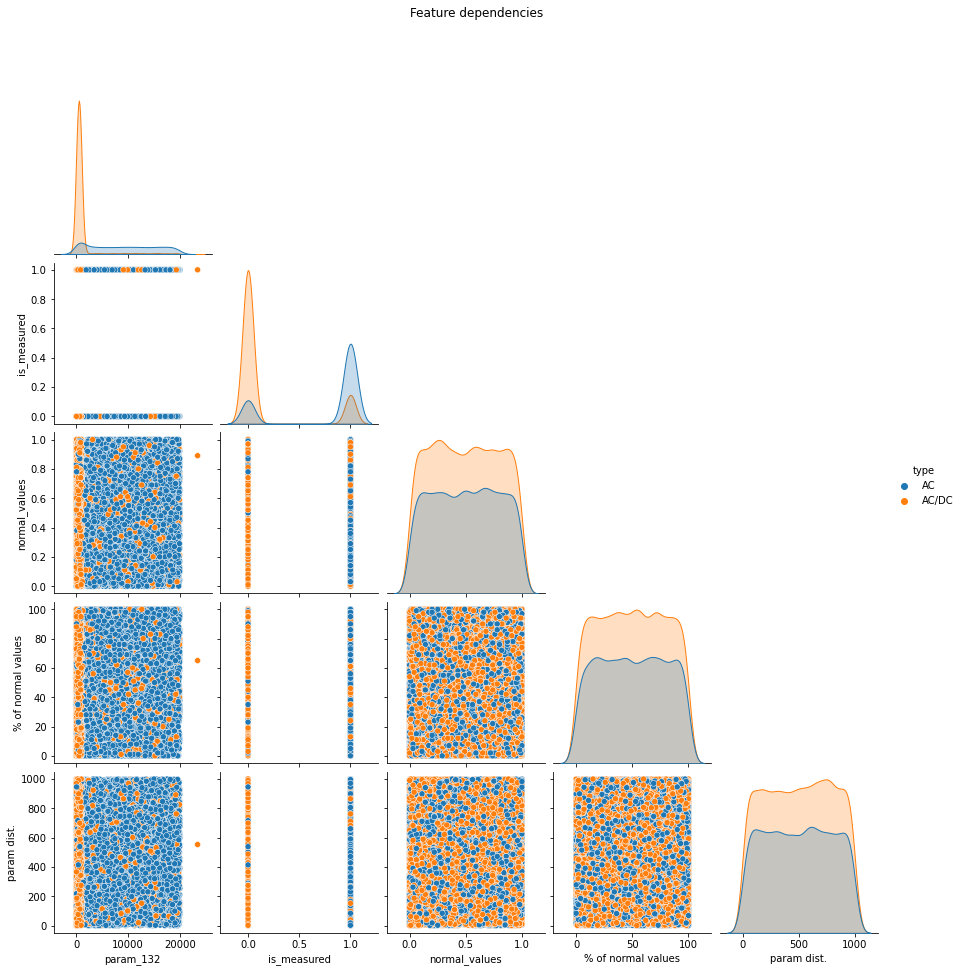

In [69]:
sns.pairplot(
    data = df,
    corner = True,
    hue= 'type'
    ).fig.suptitle(
    'Feature dependencies',
    y = 1.08
);

In [70]:
df.nunique()

param_132             8245
type                     2
is_measured              2
normal_values          101
% of normal values     101
param dist.           1001
dtype: int64

In [88]:
df.groupby('type').agg()

TypeError: Must provide 'func' or tuples of '(column, aggfunc).

In [92]:
df[(df['% of normal values'] == 100) & (df['normal_values'] == 1)]

,param_132,type,is_measured,normal_values,% of normal values,param dist.
3642,3329,AC,1,1.0,100,30
9261,8191,AC,1,1.0,100,211
10870,362,AC/DC,0,1.0,100,120


In [93]:
df[(df['% of normal values'] == 0) & (df['normal_values'] == 0)]

,param_132,type,is_measured,normal_values,% of normal values,param dist.
264,133,AC/DC,0,0.0,0,831
13902,11562,AC,1,0.0,0,709
20212,720,AC/DC,0,0.0,0,851


In [94]:
df[(df['% of normal values'] == 50) & (df['normal_values'] == 0.5)]

,param_132,type,is_measured,normal_values,% of normal values,param dist.
2787,85,AC/DC,0,0.5,50,533
12350,244,AC/DC,0,0.5,50,231
16643,308,AC/DC,1,0.5,50,394
17095,187,AC/DC,0,0.5,50,714


In [110]:
df_100 = df[(df['% of normal values'] == 100)]
df_100

,param_132,type,is_measured,normal_values,% of normal values,param dist.
104,649,AC/DC,0,0.79,100,879
241,370,AC/DC,0,0.23,100,4
607,7876,AC,1,0.96,100,315
615,269,AC,0,0.97,100,352
667,382,AC/DC,0,0.09,100,423
...,...,...,...,...,...,...
22323,7574,AC,1,0.69,100,68
22340,14516,AC,1,0.35,100,726
22538,102,AC/DC,0,0.94,100,593
22565,17117,AC,1,0.20,100,638


In [112]:
df.columns

Index(['param_132', 'type', 'is_measured', 'normal_values',
       '% of normal values', 'param dist.'],
      dtype='object')

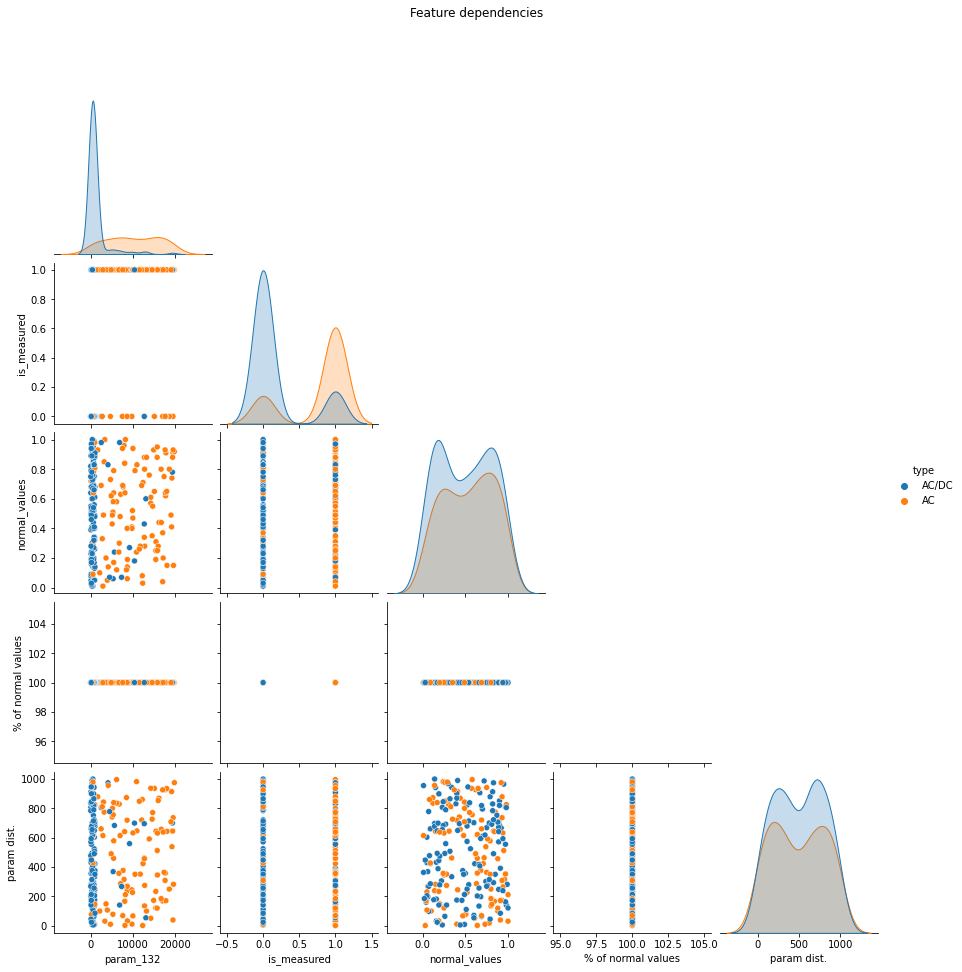

In [111]:
sns.pairplot(
    data = df_100,
    corner = True,
    hue= 'type'
    ).fig.suptitle(
    'Feature dependencies',
    y = 1.08
);

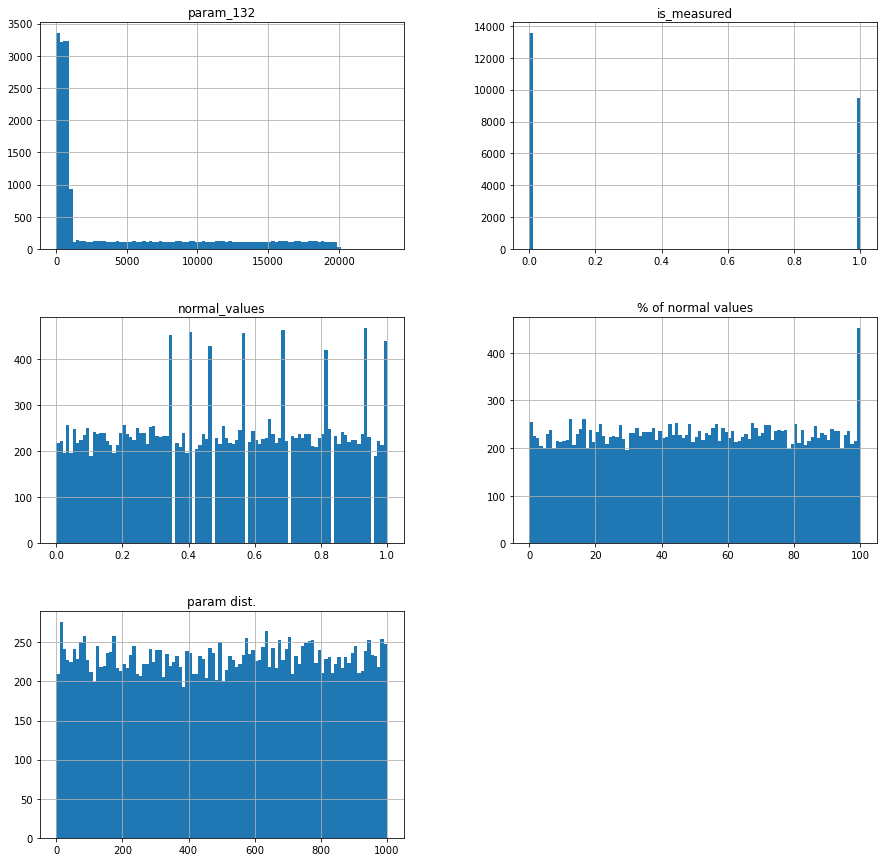

In [82]:
df.hist(figsize=(15,15), bins=100)

plt.show()

# Yangi

In [117]:
df

,param_132,type,is_measured,normal_values,% of normal values,param dist.
0,464,0,0,0.77,4,160
1,670,1,0,0.03,98,26
2,903,1,0,0.73,6,510
3,857,0,0,0.40,47,802
4,7725,0,1,0.58,31,729
...,...,...,...,...,...,...
23006,689,1,0,0.25,3,699
23007,578,1,0,0.40,66,488
23008,700,1,0,0.91,82,113
23009,33,1,0,0.05,88,366


In [118]:
from sklearn.preprocessing import MinMaxScaler

In [119]:
min_max = MinMaxScaler()

In [121]:
scaled = min_max.fit_transform(df)

array([[0.01976858, 0.        , 0.        , 0.77      , 0.04      ,
        0.16      ],
       [0.02856411, 1.        , 0.        , 0.03      , 0.98      ,
        0.026     ],
       [0.03851245, 1.        , 0.        , 0.73      , 0.06      ,
        0.51      ],
       ...,
       [0.02984501, 1.        , 0.        , 0.91      , 0.82      ,
        0.113     ],
       [0.0013663 , 1.        , 0.        , 0.05      , 0.88      ,
        0.366     ],
       [0.56735408, 0.        , 1.        , 0.29      , 0.        ,
        0.084     ]])

In [144]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import GridSearchCV

In [147]:
nn = NearestNeighbors()

In [148]:
params = {
    'n_neighbors' : np.arange(2,21),
    'weights' : ['uniform', 'distance'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size' : np.arange(10, 100, 10)
}

In [151]:
search_knn = GridSearchCV(nn, param_grid=params, verbose=2, cv=5, scoring= 'adjusted_mutual_info_score')
search_knn.fit(df)

Fitting 5 folds for each of 1368 candidates, totalling 6840 fits


ValueError: Invalid parameter weights for estimator NearestNeighbors(leaf_size=10, n_neighbors=2). Check the list of available parameters with `estimator.get_params().keys()`.

In [141]:
print("Best parameters:", search_knn.best_params_)

Best parameters: {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 2, 'weights': 'uniform'}


In [143]:
best_knn = KNeighborsClassifier(**search_knn.best_params_)
best_knn.fit(df)

TypeError: fit() missing 1 required positional argument: 'y'

In [152]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.model_selection import GridSearchCV

In [157]:
param_grid = {
    'n_clusters': np.arange(2,21),
    'init': ['k-means++', 'random'],
    'n_init': np.arange(10,110,10)
}

In [158]:
kmeans = KMeans()
grid_search = GridSearchCV(kmeans, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(df)

GridSearchCV(cv=5, estimator=KMeans(), n_jobs=-1,
             param_grid={'init': ['k-means++', 'random'],
                         'n_clusters': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20]),
                         'n_init': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100])})

In [159]:
print("Best parameters:", grid_search.best_params_)


Best parameters: {'init': 'k-means++', 'n_clusters': 20, 'n_init': 70}


In [160]:
best_kmeans = KMeans(**grid_search.best_params_)
best_kmeans.fit(df)

KMeans(n_clusters=20, n_init=70)

In [162]:
pred = best_kmeans.predict(df)

In [168]:
pred

array([17,  3, 12, ...,  3, 17,  5])

In [171]:
df['pred'] = pred

In [177]:
df.corr()

,param_132,type,is_measured,normal_values,% of normal values,param dist.,pred
param_132,1.000000,-0.642743,0.630806,0.010162,-0.003814,-0.006076,-0.068039
type,-0.642743,1.000000,-0.615135,-0.007084,-0.004236,0.006103,0.030369
is_measured,0.630806,-0.615135,1.000000,0.000636,-0.003140,-0.002129,-0.027349
normal_values,0.010162,-0.007084,0.000636,1.000000,0.009825,0.001843,-0.012697
% of normal values,-0.003814,-0.004236,-0.003140,0.009825,1.000000,0.001236,-0.005571
param dist.,-0.006076,0.006103,-0.002129,0.001843,0.001236,1.000000,-0.025473
pred,-0.068039,0.030369,-0.027349,-0.012697,-0.005571,-0.025473,1.000000


In [176]:
df.dtypes

param_132               int64
type                    int64
is_measured             int64
normal_values         float64
% of normal values      int64
param dist.             int64
pred                    int32
dtype: object

In [ ]:
import plotly.express as px
fig = px.scatter_3d(df, x='features_1', y='features_2', z='features_3', color='label', opacity = 1)
fig.show()